call back in keras

In [17]:
# dependencies
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense ,Activation

import numpy as np
from  matplotlib import pyplot as plt
from IPython.display import clear_output


In [18]:
# keras version 
keras.__version__

'2.0.9'

In [19]:
# data loding 
(X_train,y_train) , (X_test, y_test) = mnist.load_data()

In [20]:
# data preprocessing
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255


In [24]:
#plot
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [25]:
# just a logistic regression to keep it fast and simple
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

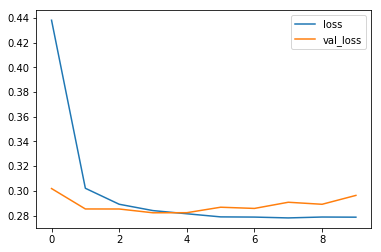

60000/60000 [==============================] - 4s 66us/step - loss: 0.2787 - acc: 0.9294 - val_loss: 0.2963 - val_acc: 0.9267


In [26]:
# in this static view it is not shown ,
#                but the plot grows step by step

model.fit(X_train, y_train,
         epochs = 10,
         validation_data = (X_test, y_test),
         callbacks = [plot_losses],
         verbose = 1)